In [5]:
from sympy import N, plot, symbols
import matplotlib.pyplot as plt

In [6]:
def lin_model(x: iter, y: iter) -> str:
    ''' Given two iterables of x and y numbers in a linear relationship, return least-squares best fit as sympy expression.
        >>>lin_model([0, 1, 2, 3], [1, 3, 4, 4])
        x + 3/2
        >>>N(lin_model([2, 3, 5, 7, 9], [4, 5, 7, 10, 15]), 4) # from sympy import N
        1.518x + 0.3049
    '''
    from sympy import Matrix, symbols, ones
    # garbage filters
    assert x and isinstance(x, list|tuple), "input must be lists or tuples of ints or floats"
    assert y and isinstance(y, list|tuple), "input must be lists or tuples of ints or floats"
    bad_values_x, bad_values_y = {}, {}
    for index, value in enumerate(x):
        if not isinstance(value, (int,float)):
            bad_values_x[index] = (value, type(value).__name__)
    for index, value in enumerate(y):
        if not isinstance(value, (int,float)):
            bad_values_y[index] = (value, type(value).__name__)
    assert not (bad_values_x or bad_values_y), ("input must be lists or tuples of ints or floats:\n"
                                                "\t\teach item reads index: (bad value, bad value type)\n"
                                                     f"\t\tx-vector: {bad_values_x}\n"
                                                     f"\t\ty-vector: {bad_values_y}")
    # initialization
    onesV = ones(1, len(x)) # make onesV the same length as vector x
    y = Matrix(y)
    M = Matrix([onesV, x]).T
    # the algorithm: linear algebra least-squares optimizer
    # a holds the coefficients of the equation y = a0 + a1 x
    a = (M.T @ M).inv() @ M.T @ y
    # initialize for printing
    x = symbols('x')
    return a[0] + x* a[1]

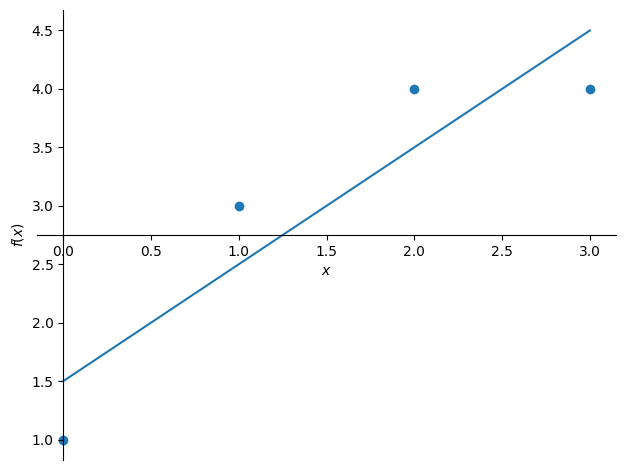

'y = x + 3/2'

In [10]:
# show datapoints, least-square line, and equation of least-square line
x = symbols('x')
fig, ax = plt.subplots()
ax.scatter([0, 1, 2, 3], [1, 3, 4, 4])
lsl = lin_model([0, 1, 2, 3], [1, 3, 4, 4]) # least-squares line
plot(lsl, (x, 0, 3), fig=fig, ax=ax); f"y = {lsl}" # plot and f-string

In [11]:
# new datapoints. give coefficients decimal fraction values
# (2, 4), (3, 5), (5, 7), (7, 10), (9, 15)
N(lin_model([2, 3, 5, 7, 9], [4, 5, 7, 10, 15]), 4) # 4-digit precision

1.518*x + 0.3049

In [12]:
# sanity check --- same datapoints passed into numpy polyfit()
from numpy import polyfit, round as nround
nround(polyfit([2, 3, 5, 7, 9], [4, 5, 7, 10, 15], 1), 3)

array([1.518, 0.305])